In [208]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("ziya07/plant-health-data")

# print("Path to dataset files:", path)

In [209]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

#load dataset
df = pd.read_csv('plants.csv')


In [210]:
df.head()

,Timestamp,Plant_ID,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal,Plant_Health_Status
0,2024-10-03 10:54:53.407995,1,27.521109,22.240245,21.900435,55.291904,556.172805,5.581955,10.003650,45.806852,39.076199,35.703006,0.941402,High Stress
1,2024-10-03 16:54:53.407995,1,14.835566,21.706763,18.680892,63.949181,596.136721,7.135705,30.712562,25.394393,17.944826,27.993296,0.164899,High Stress
2,2024-10-03 22:54:53.407995,1,17.086362,21.180946,15.392939,67.837956,591.124627,5.656852,29.337002,27.573892,35.706530,43.646308,1.081728,High Stress
3,2024-10-04 04:54:53.407995,1,15.336156,22.593302,22.778394,58.190811,241.412476,5.584523,16.966621,26.180705,26.257746,37.838095,1.186088,High Stress
4,2024-10-04 10:54:53.407995,1,39.822216,28.929001,18.100937,63.772036,444.493830,5.919707,10.944961,37.898907,37.654483,48.265812,1.609805,High Stress


In [211]:
df.columns

Index(['Timestamp', 'Plant_ID', 'Soil_Moisture', 'Ambient_Temperature',
       'Soil_Temperature', 'Humidity', 'Light_Intensity', 'Soil_pH',
       'Nitrogen_Level', 'Phosphorus_Level', 'Potassium_Level',
       'Chlorophyll_Content', 'Electrochemical_Signal', 'Plant_Health_Status'],
      dtype='object')

In [212]:
#remove unwanted columns
df=df.drop(['Timestamp','Plant_ID'], axis=1)

In [213]:
df['Plant_Health_Status'].unique()

array(['High Stress', 'Moderate Stress', 'Healthy'], dtype=object)

In [214]:
#pre-processing
df.dropna()
df.isna().sum()


Soil_Moisture             0
Ambient_Temperature       0
Soil_Temperature          0
Humidity                  0
Light_Intensity           0
Soil_pH                   0
Nitrogen_Level            0
Phosphorus_Level          0
Potassium_Level           0
Chlorophyll_Content       0
Electrochemical_Signal    0
Plant_Health_Status       0
dtype: int64

In [215]:
#encode the plant health status
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['y']=encoder.fit_transform(df['Plant_Health_Status'])

df=df.drop(['Plant_Health_Status'], axis=1)

In [216]:
df['y'].unique()

array([1, 2, 0])

In [217]:
df.head()

,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal,y
0,27.521109,22.240245,21.900435,55.291904,556.172805,5.581955,10.003650,45.806852,39.076199,35.703006,0.941402,1
1,14.835566,21.706763,18.680892,63.949181,596.136721,7.135705,30.712562,25.394393,17.944826,27.993296,0.164899,1
2,17.086362,21.180946,15.392939,67.837956,591.124627,5.656852,29.337002,27.573892,35.706530,43.646308,1.081728,1
3,15.336156,22.593302,22.778394,58.190811,241.412476,5.584523,16.966621,26.180705,26.257746,37.838095,1.186088,1
4,39.822216,28.929001,18.100937,63.772036,444.493830,5.919707,10.944961,37.898907,37.654483,48.265812,1.609805,1


In [218]:
#split the dataset
from sklearn.model_selection import train_test_split
y=df['y']
X=df.drop(['y'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [219]:
#choose our models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [220]:
model_lr=LogisticRegression()
model_lr.fit(x_train, y_train)

#evaluate accuracy
from sklearn.metrics import accuracy_score
y_pred=model_lr.predict(x_test)
score=accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {score}')
results={
    'LogisticRegression': score
}


Logistic Regression Accuracy: 0.7083333333333334


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [221]:
#random forest
model_rf=RandomForestClassifier()
model_rf=model_rf.fit(x_train, y_train)
y_pred=model_rf.predict(x_test)
score=accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {score}')
results['RandomForestClassifier']=score

Random Forest Accuracy: 0.9944444444444445


In [222]:
#naive bayes
model_nb=GaussianNB()
model_nb=model_nb.fit(x_train, y_train)
y_pred=model_nb.predict(x_test)
score=accuracy_score(y_test, y_pred)
results['NaiveBayes']=score
print(f'Naive Bayes Accuracy: {score}')

Naive Bayes Accuracy: 0.8194444444444444


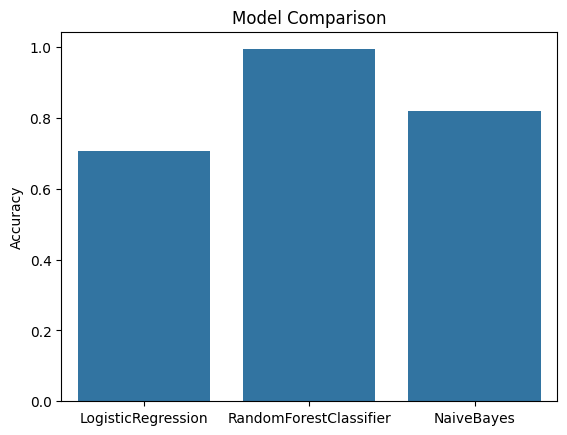

In [223]:
#visualize the results
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()


In [224]:
results

{'LogisticRegression': 0.7083333333333334,
 'RandomForestClassifier': 0.9944444444444445,
 'NaiveBayes': 0.8194444444444444}

In [225]:
#tuning the model with grid test
#tune the logistics regression model

from sklearn.model_selection import GridSearchCV

param_grid={
    'C': [0.1, 1, 10, 13,15,20,30, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear','newton-cg','lbfgs'],
}

grid=GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=3)
grid.fit(x_train, y_train)
score=grid.score(x_test, y_test)

#print the best parameters
print(grid.best_params_)
print(f'Logistic Regression Accuracy: {score}')


Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.714 total time=   0.0s
[CV 2/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.708 total time=   0.0s
[CV 3/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.679 total time=   0.0s
[CV 4/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.696 total time=   0.0s
[CV 5/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.690 total time=   0.0s
[CV 1/5] END .C=0.1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END .C=0.1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END .C=0.1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END .C=0.1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END .C=0.1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END .....C=0.1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .....C=0.1, penalty=l1, solve

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

[CV 4/5] END .C=1, penalty=l1, solver=liblinear;, score=0.702 total time=   0.0s
[CV 5/5] END .C=1, penalty=l1, solver=liblinear;, score=0.720 total time=   0.0s
[CV 1/5] END ...C=1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END ...C=1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END ...C=1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END ...C=1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END ...C=1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END .C=1, penalty=l

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

[CV 3/5] END C=10, penalty=l1, solver=liblinear;, score=0.696 total time=   0.1s
[CV 4/5] END C=10, penalty=l1, solver=liblinear;, score=0.696 total time=   0.0s
[CV 5/5] END C=10, penalty=l1, solver=liblinear;, score=0.738 total time=   0.0s
[CV 1/5] END ..C=10, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END ..C=10, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END ..C=10, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END ..C=10, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END ..C=10, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ......C=10, pen

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

[CV 3/5] END C=13, penalty=l1, solver=liblinear;, score=0.696 total time=   0.0s
[CV 4/5] END C=13, penalty=l1, solver=liblinear;, score=0.696 total time=   0.0s
[CV 5/5] END C=13, penalty=l1, solver=liblinear;, score=0.738 total time=   0.0s
[CV 1/5] END ..C=13, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END ..C=13, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END ..C=13, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END ..C=13, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END ..C=13, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END ......C=13, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ......C=13, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ......C=13, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ......C=13, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ......C=13, pen

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

[CV 2/5] END C=15, penalty=l1, solver=liblinear;, score=0.756 total time=   0.0s
[CV 3/5] END C=15, penalty=l1, solver=liblinear;, score=0.696 total time=   0.1s
[CV 4/5] END C=15, penalty=l1, solver=liblinear;, score=0.696 total time=   0.0s
[CV 5/5] END C=15, penalty=l1, solver=liblinear;, score=0.738 total time=   0.0s
[CV 1/5] END ..C=15, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END ..C=15, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END ..C=15, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END ..C=15, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END ..C=15, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END ......C=15, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ......C=15, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ......C=15, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ......C=15, pen

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

[CV 2/5] END C=20, penalty=l1, solver=liblinear;, score=0.756 total time=   0.0s
[CV 3/5] END C=20, penalty=l1, solver=liblinear;, score=0.696 total time=   0.1s
[CV 4/5] END C=20, penalty=l1, solver=liblinear;, score=0.696 total time=   0.1s
[CV 5/5] END C=20, penalty=l1, solver=liblinear;, score=0.738 total time=   0.0s
[CV 1/5] END ..C=20, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END ..C=20, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END ..C=20, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END ..C=20, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END ..C=20, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END ......C=20, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ......C=20, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ......C=20, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ......C=20, pen

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

[CV 1/5] END C=30, penalty=l1, solver=liblinear;, score=0.756 total time=   0.0s
[CV 2/5] END C=30, penalty=l1, solver=liblinear;, score=0.756 total time=   0.0s
[CV 3/5] END C=30, penalty=l1, solver=liblinear;, score=0.696 total time=   0.0s
[CV 4/5] END C=30, penalty=l1, solver=liblinear;, score=0.696 total time=   0.0s
[CV 5/5] END C=30, penalty=l1, solver=liblinear;, score=0.726 total time=   0.0s
[CV 1/5] END ..C=30, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END ..C=30, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END ..C=30, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END ..C=30, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END ..C=30, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END ......C=30, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ......C=30, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ......C=30, pen

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

[CV 5/5] END ....C=30, penalty=l2, solver=lbfgs;, score=0.708 total time=   0.0s
[CV 1/5] END C=100, penalty=l1, solver=liblinear;, score=0.756 total time=   0.0s
[CV 2/5] END C=100, penalty=l1, solver=liblinear;, score=0.756 total time=   0.0s
[CV 3/5] END C=100, penalty=l1, solver=liblinear;, score=0.696 total time=   0.1s
[CV 4/5] END C=100, penalty=l1, solver=liblinear;, score=0.696 total time=   0.0s
[CV 5/5] END C=100, penalty=l1, solver=liblinear;, score=0.732 total time=   0.0s
[CV 1/5] END .C=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END .C=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END .C=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END .C=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END .C=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END .....C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .....C=100

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

[CV 3/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.667 total time=   0.0s
[CV 4/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.690 total time=   0.0s
[CV 5/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.702 total time=   0.0s
[CV 1/5] END C=1000, penalty=l1, solver=liblinear;, score=0.756 total time=   0.1s
[CV 2/5] END C=1000, penalty=l1, solver=liblinear;, score=0.756 total time=   0.0s
[CV 3/5] END C=1000, penalty=l1, solver=liblinear;, score=0.696 total time=   0.0s
[CV 4/5] END C=1000, penalty=l1, solver=liblinear;, score=0.696 total time=   0.1s
[CV 5/5] END C=1000, penalty=l1, solver=liblinear;, score=0.726 total time=   0.0s
[CV 1/5] END C=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=100

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

In [226]:
#bvest parameters
tuned_model=LogisticRegression(C=0.1, penalty='l2', solver='newton-cg')
tuned_model.fit(x_train, y_train)
y_pred=tuned_model.predict(x_test)
score=accuracy_score(y_test, y_pred)
print(f'Tuned Logistic Regression Accuracy: {score}')


Tuned Logistic Regression Accuracy: 0.7555555555555555


In [ ]:
#27.521109	22.240245	21.900435	55.291904	556.172805	5.581955	10.003650	45.806852	39.076199	35.703006	0.941402
prediction=tuned_model.predict([[27.521109,22.240245,21.900435,55.291904,556.172805,5.581955,10.003650,45.806852,39.076199,35.703006,0.941402]])
prediction

real_prediction=encoder.inverse_transform(prediction)
real_prediction



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['High Stress'], dtype=object)

In [229]:
#Soil_Moisture	Ambient_Temperature	Soil_Temperature	Humidity	Light_Intensity	Soil_pH	Nitrogen_Level	Phosphorus_Level	Potassium_Level	Chlorophyll_Content	Electrochemical_Signal

def predict( Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal):

    prediction=tuned_model.predict([[Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal]])
    real_prediction=encoder.inverse_transform(prediction)
    return real_prediction


predict(
    Soil_Moisture=27.521109,
    Ambient_Temperature=22.240245,
    Soil_Temperature=21.900435,
    Humidity=55.291904,
    Light_Intensity=556.172805,
    Soil_pH=5.581955,
    Nitrogen_Level=10.003650,
    Phosphorus_Level=45.806852,
    Potassium_Level=39.076199,
    Chlorophyll_Content=35.703006,
    Electrochemical_Signal=0.941402
)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['High Stress'], dtype=object)